# Food computer vision model

All these cells have been run in Google Colab

In [9]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/maxheilingbrunner/Documents/virtual-nutritionist-bot/food_Vision


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.1 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 1254.5/1858.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Creation of a Custom model

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 429, 'y': 823, 'width': 120, 'height': 108, 'confidence': 0.7373543977737427, 'class': 'bell_pepper', 'image_path': 'images/fridge2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 863, 'y': 740, 'width': 73, 'height': 108, 'confidence': 0.7359084486961365, 'class': 'cheese', 'image_path': 'images/fridge2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 926, 'y': 750, 'width': 75, 'height': 109, 'confidence': 0.711359441280365, 'class': 'cheese', 'image_path': 'images/fridge2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 263, 'y': 831, 'width': 110, 'height': 115, 'confidence': 0.6561217904090881, 'class': 'lemon', 'image_path': 'images/fridge2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 990, 'y': 718, 'width': 69, 'height': 191, 'confidence': 0.6211365461349487, 'class': 'milk', 'image_path': 'images/fridge2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 1036, 

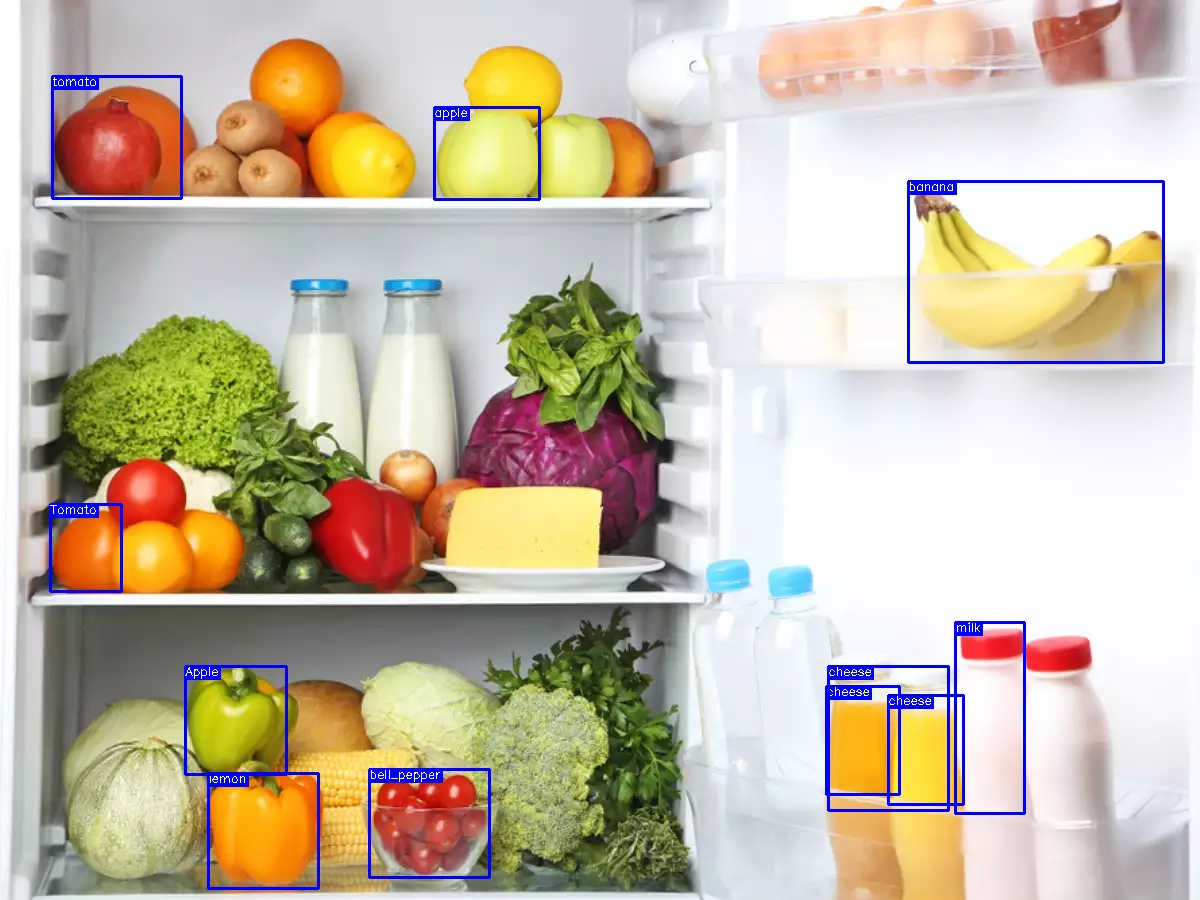

In [28]:
from roboflow import Roboflow

rf = Roboflow(api_key="ykb4QpRXCea795yWi0WK")
project = rf.workspace().project("nutrition-object-detection")
model = project.version(1).model

image_name = "fridge2"

# infer on a local image
data = model.predict(f"images/{image_name}.jpg", confidence=50, overlap=50).json()
print(data)

# visualize your prediction
model.predict(f"images/{image_name}.jpg", confidence=50, overlap=50).save(f"predictions/{image_name}_prediction.jpg")

# show image
Image(filename=f'predictions/{image_name}_prediction.jpg', height=600)

In [30]:
# Extract the class types from predictions
classes = list(set(prediction['class'] for prediction in data['predictions']))

# Print the list of class types
print(classes)

['bell_pepper', 'cheese', 'cheese', 'lemon', 'milk', 'banana', 'Tomato', 'Apple', 'apple', 'tomato', 'cheese']
